Anomalous Diffusion spectral fits


adding absolute percent difference

and adding bland altman as a percent 

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline
import csv

import scipy.optimize as op
import scipy.stats
from scipy.optimize import curve_fit
import scipy.io
from scipy.stats import rice

import random
import pickle
import seaborn as sns

import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats, wilcoxon,ttest_rel, pearsonr,shapiro,f_oneway, ranksums
from scipy.special import stdtr
import csv
import pandas as pd

from scipy.integrate import quad
import sys 
import os
#sys.path.append(os.path.abspath("/Users/neuroimaging/Desktop/MR-code/Python_Code"))

#from ML_UsefulFunctions import *
#from KidneyROIAnalyses import *

from scipy import special

from scipy.integrate import tplquad

pd.options.display.float_format = '{:.3f}'.format

from sklearn.metrics import r2_score


from sklearn.feature_selection import SequentialFeatureSelector

import warnings
warnings.simplefilter("ignore")


from EllipsoidalSimulationCode import *

from statistics import mean

pl.rcParams["font.family"] = "Times New Roman"


def func(x,m,b):
    return m*x + b


def biexp_func(b, frac_fast,frac_slow,diff_fast,diff_slow):
    Data = frac_slow*np.exp(-b*diff_slow)+frac_fast*np.exp(-b*diff_fast)
    normal = frac_slow+frac_fast
    return Data/normal

def monoexp_func(b, frac, diff):
    Data = frac*np.exp(-b*diff)
    return Data

In [3]:
def CalculatePE_fraction(df, trait):
    df[trait + ' PE'] = (df['Fit ' + trait]-df['true ' + trait])#*100/(df['true ' + trait])
    return df

def CalculatePE_diffusion(df, trait): #scale by 1000
    df[trait + ' PE'] = ((df['Fit ' +trait]/1000)-df['true ' + trait])#*100/(df['true ' + trait])
    return df

In [4]:
b = [0,10,30,50,80,120,200,400,800]

In [8]:
pl.rcParams["font.family"] = "serif"
pl.rcParams["mathtext.fontset"] = "dejavuserif"
matplotlib.rcParams.update({'font.size': 18})

In [10]:
def blandalt_calc(FitfDs,TruefDs, name):
    mean_diff = np.mean(FitfDs-TruefDs)
    mean_diff_percent = 100*mean_diff/np.mean((FitfDs+TruefDs)/2)
    std_diff = np.std(FitfDs-TruefDs)
    std_diff_percent = 100*std_diff/np.mean((FitfDs+TruefDs)/2)
    lower_bound=mean_diff-(std_diff*1.96)
    upper_bound=mean_diff+(std_diff*1.96)
    lower_bound_percent=mean_diff_percent-(1.96*std_diff_percent)
    upper_bound_percent=mean_diff_percent+(1.96*std_diff_percent)
    print(f'{name} BA, {mean_diff:.3f}, [{lower_bound:.3f}-{upper_bound:.3f}]')
    print(f'{name} %BA, {mean_diff_percent:.3f}%, [{lower_bound_percent:.3f}%-{upper_bound_percent:.3f}%]\n')
    return
    
    

# Spectral anomalous with noise

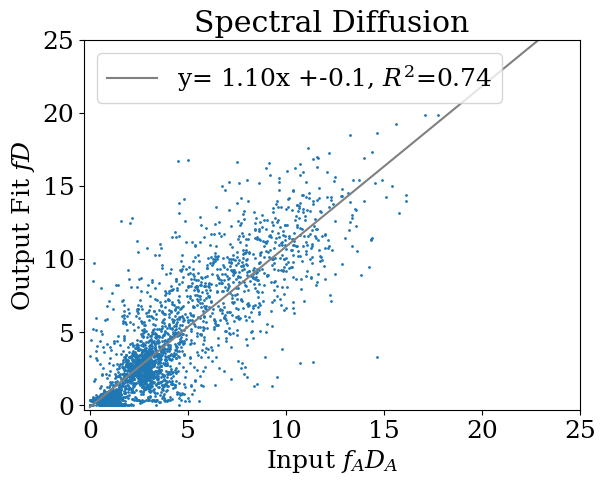

SignificanceResult(statistic=0.8416523797807527, pvalue=0.0)
All fD difference = 0.23383 ± 2.08122, -9.36121%
fast fD difference = 1.45122 ± 2.89894, 22.26840%
med fD difference = -0.22114 ± 1.44834, -3.82032%
slow fD difference = -0.52859 ± 0.47174, -55.24157%
relative percent difference
fast fD  20.03739%
med fD -3.89473%
slow fD -76.32244%

relative abs percent difference
fast fD  28.77426%
med fD 28.26669%
slow fD 80.16315%

percent bland altman
fast fD BA, 1.451, [-4.231-7.133]
fast fD %BA, 19.054%, [-55.548%-93.656%]

med fD BA, -0.221, [-3.060-2.618]
med fD %BA, -7.573%, [-104.791%-89.645%]

slow fD BA, -0.529, [-1.453-0.396]
slow fD %BA, -83.540%, [-229.667%-62.587%]

all fD BA, 0.234, [-3.845-4.313]
all fD %BA, 6.281%, [-103.286%-115.847%]



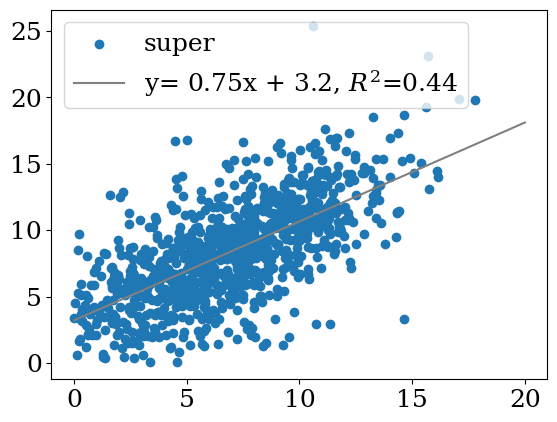

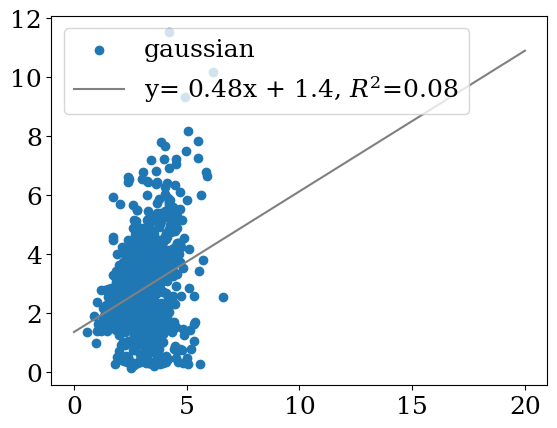

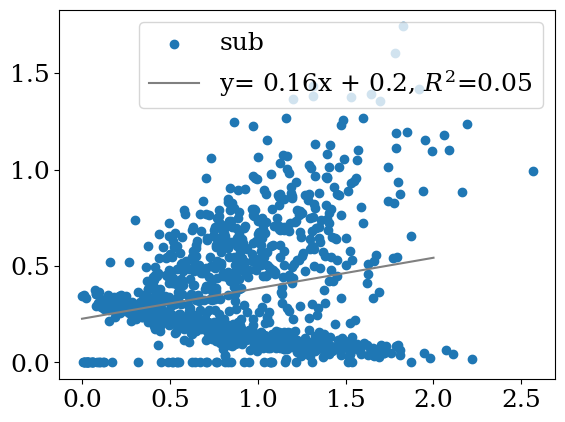

0.9969228537090714 0.010012375160848097
2.947 0.22403347964087703
now just f and D independently


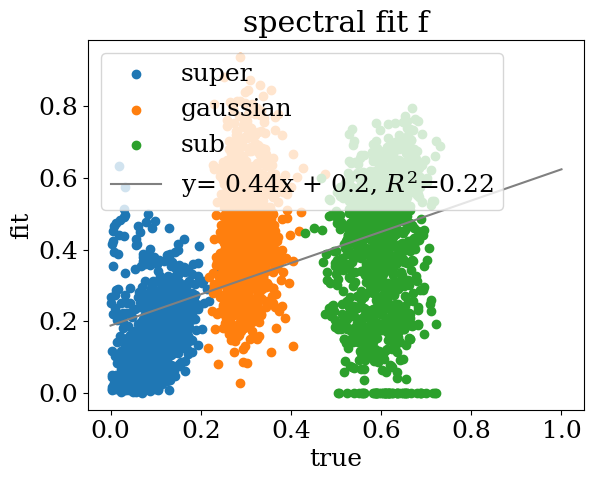

relative percent difference
fast f  39.53964%
med f 30.33652%
slow f -29.92282%

relative abs percent difference
fast f  50.20362%
med f 35.21872%
slow f 30.06131%

percent bland altman
fast f BA, 0.066, [-0.124-0.256]
fast f %BA, 50.423%, [-94.619%-195.465%]

med f BA, 0.133, [-0.169-0.435]
med f %BA, 36.142%, [-46.036%-118.320%]

slow f BA, -0.199, [-0.576-0.178]
slow f %BA, -39.697%, [-114.852%-35.459%]



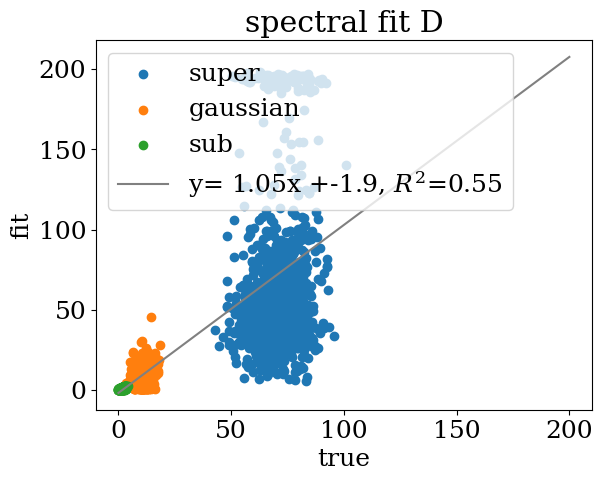

relative percent difference
fast D  -22.04882%
med D -37.85432%
slow D -49.82951%

relative abs percent difference
fast D  41.17764%
med D 43.79629%
slow D 52.33954%

percent bland altman
fast D BA, 1.578, [-97.195-100.350]
fast D %BA, 2.218%, [-136.616%-141.051%]

med D BA, -2.667, [-11.614-6.279]
med D %BA, -30.617%, [-133.306%-72.073%]

slow D BA, -0.695, [-1.959-0.568]
slow D %BA, -60.783%, [-171.178%-49.613%]



In [13]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExpSimulatedCurves_anomalous_12172024_3comp.xlsx'
Truth = pd.read_excel(fileloc,sheet_name = 'Parameters') 
Truth=Truth.rename(columns={c: 'true '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})
Truth=Truth.rename(columns={c: c+'tion' for c in Truth.columns if 'frac' in c})
#Truth=Truth.rename(columns={c: 'diffusion' for c in Truth.columns if ' D' in c})


fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/Simulated_3peak_AnomalousDiffusionSpectra_Fits_rerun.xlsx'
TrueDataFits = pd.read_excel(fileloc,sheet_name = 'lmd_01_AN_A_SNR_50') #s means sorted
TrueDataFits=TrueDataFits.rename(columns={c: 'Fit '+c for c in TrueDataFits.columns if c not in ['Run Number', 'Unnamed']})


df_AveragedData = pd.merge(Truth, TrueDataFits, how = 'inner', left_on=["Run Number"], right_on = ['Run Number'])
df_AveragedData['Fit slow diffusion'] = df_AveragedData['Fit slow diffusion'].fillna(0)

TruefastfDs = 1000*df_AveragedData['true fast fraction']*df_AveragedData['true fast diffusion']#**(1/df_AveragedData['true fast gamma']))
TruemedfDs = 1000*df_AveragedData['true med fraction']*df_AveragedData['true med diffusion']#**(1/df_AveragedData['true med gamma']))
TrueslowfDs = 1000*df_AveragedData['true slow fraction']*df_AveragedData['true slow diffusion']#**(1/df_AveragedData['true slow gamma']))

FitfastfDs = df_AveragedData['Fit fast fraction']*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']*df_AveragedData['Fit slow diffusion']



#pl.scatter(TruefastfDs,FitfastfDs,label='super')
#pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
#pl.scatter(TrueslowfDs,FitslowfDs,label='sub')


AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))

pl.scatter(AllTruefD, allFitfD, s=1)
x = np.linspace(0,25,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('Spectral Diffusion')
pl.xlabel('Input $f_AD_A$')
pl.ylabel('Output Fit $fD$')
pl.xlim(-0.3,25)
pl.ylim(-0.3,25)
pl.show()


print(scipy.stats.spearmanr(AllTruefD,allFitfD))
print(f'All fD difference = {np.mean(allFitfD - AllTruefD):.5f} ± {np.std(allFitfD - AllTruefD):.5f}, {100*np.median((allFitfD - AllTruefD)/AllTruefD):.5f}%')
print(f'fast fD difference = {np.mean(FitfastfDs - TruefastfDs):.5f} ± {np.std(FitfastfDs - TruefastfDs):.5f}, {100*np.median((FitfastfDs - TruefastfDs)/TruefastfDs):.5f}%')
print(f'med fD difference = {np.mean(FitmedfDs - TruemedfDs):.5f} ± {np.std(FitmedfDs - TruemedfDs):.5f}, {100*np.median((FitmedfDs - TruemedfDs)/TruemedfDs):.5f}%')
print(f'slow fD difference = {np.mean(FitslowfDs - TrueslowfDs):.5f} ± {np.std(FitslowfDs - TrueslowfDs):.5f}, {100*np.median((FitslowfDs - TrueslowfDs)/TrueslowfDs):.5f}%')


print('relative percent difference')
print(f'fast fD  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\nrelative abs percent difference')
print(f'fast fD  {200*np.median(abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median(abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median(abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')



print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast fD')
blandalt_calc(FitmedfDs,TruemedfDs,'med fD')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow fD')
blandalt_calc(allFitfD,AllTruefD,'all fD')






pl.scatter(TruefastfDs,FitfastfDs,label='super')
#pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
#pl.scatter(TrueslowfDs,FitslowfDs,label='sub')

AllTruefD = np.array(list(TruefastfDs))#+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs))#+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 

pl.legend()
pl.show()





#pl.scatter(TruefastfDs,FitfastfDs,label='super')
pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
#pl.scatter(TrueslowfDs,FitslowfDs,label='sub')

AllTruefD = np.array(list(TruemedfDs))#+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitmedfDs))#+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()








#pl.scatter(TruefastfDs,FitfastfDs,label='super')
#pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
pl.scatter(TrueslowfDs,FitslowfDs,label='sub')

AllTruefD = np.array(list(TrueslowfDs))#+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitslowfDs))#+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,2,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()


# so the effect of diffusion seems to be linear with relation to fADA? 


print(np.mean(TrueDataFits['Fit rsq']), np.std(TrueDataFits['Fit rsq']))
print(np.mean(TrueDataFits['Fit number of peaks']), np.std(TrueDataFits['Fit number of peaks']))





print('now just f and D independently')


TruefastfDs = df_AveragedData['true fast fraction']#*(df_AveragedData['true fast diffusion']**(1/df_AveragedData['true fast gamma']))
TruemedfDs = df_AveragedData['true med fraction']#*(df_AveragedData['true med diffusion']**(1/df_AveragedData['true med gamma']))
TrueslowfDs = df_AveragedData['true slow fraction']#*(df_AveragedData['true slow diffusion']**(1/df_AveragedData['true slow gamma']))

FitfastfDs = df_AveragedData['Fit fast fraction']#*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']#*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']#*df_AveragedData['Fit slow diffusion']



pl.scatter(TruefastfDs,FitfastfDs,label='super')
pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
pl.scatter(TrueslowfDs,FitslowfDs,label='sub')


AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,1,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('spectral fit f')
pl.xlabel('true')
pl.ylabel('fit')
pl.show()

print('relative percent difference')
print(f'fast f  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med f {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow f {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')

print('\nrelative abs percent difference')
print(f'fast f  {200*np.median(abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med f {200*np.median(abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow f {200*np.median(abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')



print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast f')
blandalt_calc(FitmedfDs,TruemedfDs,'med f')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow f')





TruefastfDs = 1000*(df_AveragedData['true fast diffusion'])#**(1/df_AveragedData['true fast gamma']))
TruemedfDs = 1000*(df_AveragedData['true med diffusion'])#**(1/df_AveragedData['true med gamma']))
TrueslowfDs = 1000*(df_AveragedData['true slow diffusion'])#**(1/df_AveragedData['true slow gamma']))

FitfastfDs = df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow diffusion']



pl.scatter(TruefastfDs,FitfastfDs,label='super')
pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
pl.scatter(TrueslowfDs,FitslowfDs,label='sub')


AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,200,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('spectral fit D')
pl.xlabel('true')
pl.ylabel('fit')
pl.show()

print('relative percent difference')
print(f'fast D  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med D {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow D {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')



print('\nrelative abs percent difference')
print(f'fast D  {200*np.median(abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med D {200*np.median(abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow D {200*np.median(abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')




print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast D')
blandalt_calc(FitmedfDs,TruemedfDs,'med D')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow D')




# now tri-exp of anomalous with noise

goodness of fit: r2=0.99625±0.00279


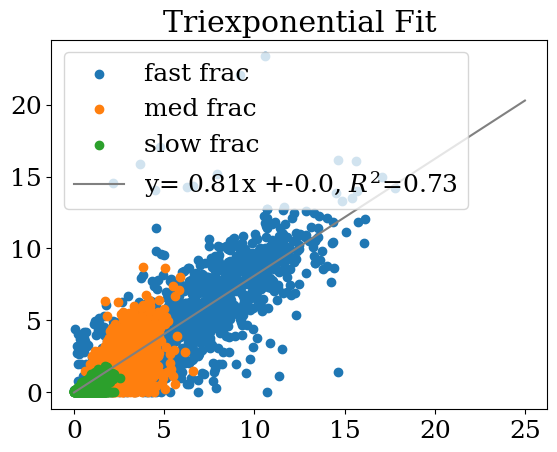

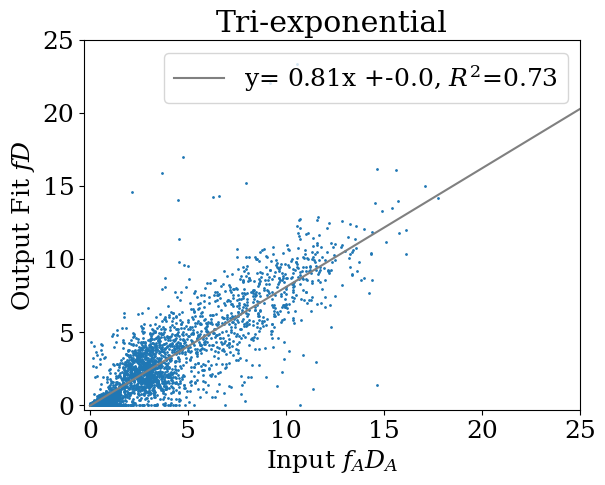

SignificanceResult(statistic=0.837483686387076, pvalue=0.0)
All fD difference = -0.00071 ± 0.00167, 35.93024%
fast fD mean difference = -1.04878± 2.47333, 25.29385%
med fD mean difference = -0.50563± 1.35994, 31.74960%
slow fD mean difference = -0.56212± 0.46911, 63.14666%
relative percent difference
fast fD  -16.71119%
med fD -14.22401%
slow fD -87.78618%
mean relative percent difference
fast fD  -19.75884%
med fD -25.35416%
slow fD -105.48140%

median abs percent difference
fast fD  27.23717%
med fD 31.19666%
slow fD 90.23945%

percent bland altman
fast fD BA, -1.049, [-5.897-3.799]
fast fD %BA, -16.474%, [-92.620%-59.672%]

med fD BA, -0.506, [-3.171-2.160]
med fD %BA, -18.203%, [-114.162%-77.756%]

slow fD BA, -0.562, [-1.482-0.357]
slow fD %BA, -91.257%, [-240.523%-58.009%]

all fD BA, -0.706, [-3.978-2.567]
all fD %BA, -21.686%, [-122.287%-78.915%]

3.0 0.0
now just f and D independently


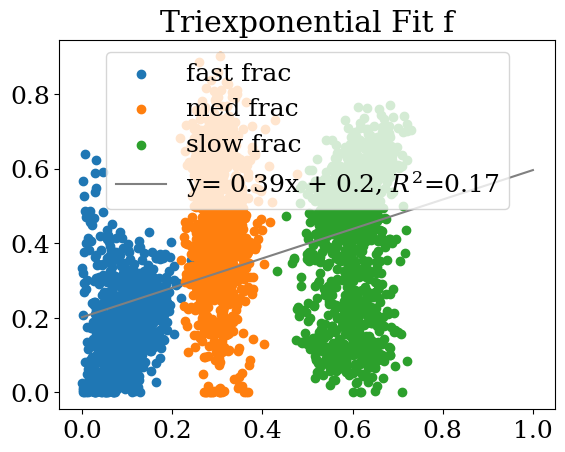

relative percent difference
fast D  42.38712%
med D 30.45989%
slow D -29.30308%

relative abs percent difference
fast D  56.91110%
med D 39.47548%
slow D 29.30308%

percent bland altman
fast f BA, 0.079, [-0.134-0.292]
fast f %BA, 57.571%, [-97.492%-212.635%]

med f BA, 0.127, [-0.228-0.482]
med f %BA, 34.807%, [-62.589%-132.204%]

slow f BA, -0.206, [-0.589-0.177]
slow f %BA, -41.430%, [-118.459%-35.599%]



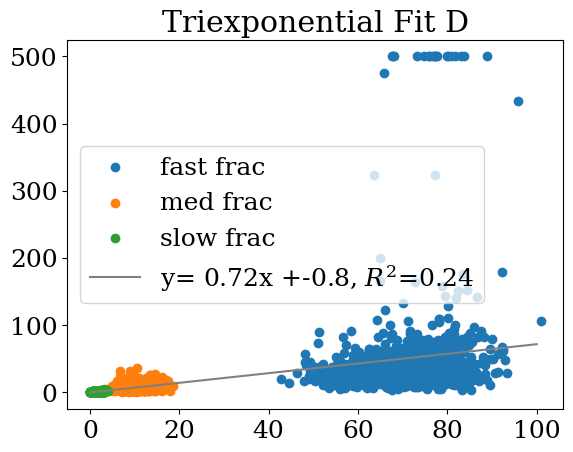

relative percent difference
fast D  -64.19697%
med D -47.64329%
slow D -56.53891%

relative abs percent difference
fast D  66.75133%
med D 53.25935%
slow D 58.99738%

percent bland altman
fast D BA, -21.438, [-157.894-115.017]
fast D %BA, -35.948%, [-264.760%-192.863%]

med D BA, -3.084, [-12.071-5.903]
med D %BA, -36.265%, [-141.948%-69.419%]

slow D BA, -0.850, [-2.313-0.614]
slow D %BA, -79.616%, [-216.766%-57.533%]



In [20]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExpSimulatedCurves_anomalous_12172024_3comp.xlsx'
df_True = pd.read_excel(fileloc,sheet_name = 'TrueData_SNR_50') 

df_TrueParams = pd.read_excel(fileloc,sheet_name = 'Parameters') 
df_TrueParams=df_TrueParams.rename(columns={c: 'true '+c for c in df_TrueParams.columns if c not in ['Run Number', 'Unnamed']})
df_TrueParams=df_TrueParams.rename(columns={c: c+'tion' for c in df_TrueParams.columns if 'frac' in c})

df_AveragedNoise = pd.read_excel(fileloc,sheet_name = 'AN_A_SNR_50') 
#Truth=Truth.rename(columns={c: 'True '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})

# trying tri-exp fit to the df_True
b_values11 = np.array([0,10,30,50,80,120,200,400,800])#, 1100, 1380]) # medium range 11 b values 0 - 1380

TrueFracs = []
TrueDiffs = []
TrueGammas = []
FitFracs = []
FitDiffs = []
r2_fit=[]
compartment_number=[]
for j in range(1000):
    #norm = df_TrueParams['true fast fraction'].iloc[j]+df_TrueParams['true med fraction'].iloc[j]+df_TrueParams['true slow fraction'].iloc[j]
    #pl.plot(b_values11,df_True.iloc[j,1:]/norm)
    #pl.scatter(b_values11,triexp_func(b_values11, df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j],df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]))
    popt, pcov = curve_fit(triexp_func, b_values11,df_AveragedNoise.iloc[j,2:],p0=[.1,.2,.7, 0.1, 0.01, 0.001],bounds=(0, [1,1,1,.5,.1,.1]),maxfev=10000)
    #pl.scatter(b_values11,triexp_func(b_values11,*popt))
    
    ## order popt from fast to slow diffusion
    norm_popt = popt[0]+popt[1]+popt[2]
    idx_sort = popt[3:6].argsort()
    fracs = popt[0:3]/norm_popt
    diffusions = popt[3:6]
    fracs=fracs[idx_sort[::-1]]
    diffusions=diffusions[idx_sort[::-1]]
    #print(*[df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j],df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    
    ## order given true values from fast to slow just in case
    givengammas = np.array([df_TrueParams['true fast gamma'].iloc[j],df_TrueParams['true med gamma'].iloc[j],df_TrueParams['true slow gamma'].iloc[j]])
    givenfracs = np.array([df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j]])
    givendiffusions = np.array([df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    idx_sort = givendiffusions.argsort()
    givenfracs = givenfracs[idx_sort[::-1]]
    givendiffusions = givendiffusions[idx_sort[::-1]]

    TrueFracs.append(list(givenfracs))
    TrueDiffs.append(list(givendiffusions))
    FitFracs.append(list(fracs))
    FitDiffs.append(list(diffusions))
    TrueGammas.append(list(givengammas))

    comp_num = 3-np.count_nonzero(FitFracs==0) #how many compartments with fraction=0
    compartment_number.append(comp_num)
    y_pred = triexp_func(b_values11, *popt)
    r2_goodness = r2_score(df_AveragedNoise.iloc[j,2:], y_pred)
    r2_fit.append(r2_goodness)
    
print(f'goodness of fit: r2={np.mean(r2_fit):.5f}±{np.std(r2_fit):.5f}') 

TruefastfDs= 1000*np.array(TrueFracs)[:,0]*((np.array(TrueDiffs)[:,0]))#**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = 1000*np.array(FitFracs)[:,0]*np.array(FitDiffs)[:,0]

TruemedfDs= 1000*np.array(TrueFracs)[:,1]*(np.array(TrueDiffs)[:,1])#**(1/np.array(TrueGammas)[:,1]))
FitmedfDs = 1000*np.array(FitFracs)[:,1]*np.array(FitDiffs)[:,1]

TrueslowfDs= 1000*np.array(TrueFracs)[:,2]*(np.array(TrueDiffs)[:,2])#**(1/np.array(TrueGammas)[:,2])) #setting it to zero
FitslowfDs = 1000*np.array(FitFracs)[:,2]*np.array(FitDiffs)[:,2]


#pl.scatter(1000*np.array(TrueFracs)[:,0]*np.array(TrueDiffs)[:,0], 1000*np.array(FitFracs)[:,0]*np.array(FitDiffs)[:,0],label= 'fast frac')
#pl.scatter(1000*np.array(TrueFracs)[:,1]*np.array(TrueDiffs)[:,1], 1000*np.array(FitFracs)[:,1]*np.array(FitDiffs)[:,1],label= 'med frac')
#pl.scatter(1000*np.array(TrueFracs)[:,2]*np.array(TrueDiffs)[:,2], 1000*np.array(FitFracs)[:,2]*np.array(FitDiffs)[:,2],label= 'slow frac')


pl.scatter(TruefastfDs, FitfastfDs,label= 'fast frac')
pl.scatter(TruemedfDs,FitmedfDs,label= 'med frac')
pl.scatter(TrueslowfDs, FitslowfDs,label= 'slow frac')


AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))


x = np.linspace(0,25,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('Triexponential Fit')
pl.show()

pl.scatter(AllTruefD, allFitfD, s=1)
x = np.linspace(0,25,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('Tri-exponential')
pl.xlabel('Input $f_AD_A$')
pl.ylabel('Output Fit $fD$')
pl.xlim(-0.3,25)
pl.ylim(-0.3,25)
pl.show()


print(scipy.stats.spearmanr((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)))
print(f'All fD difference = {np.mean((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)):.5f} ± {np.std((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)):.5f}, {100*np.median(np.abs(((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)))/(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)):.5f}%')
print(f'fast fD mean difference = {np.mean(FitfastfDs-TruefastfDs):.5f}± {np.std(FitfastfDs-TruefastfDs):.5f}, {100*np.median(np.abs((FitfastfDs-TruefastfDs))/TruefastfDs):.5f}%')
print(f'med fD mean difference = {np.mean(FitmedfDs-TruemedfDs):.5f}± {np.std(FitmedfDs-TruemedfDs):.5f}, {100*np.median(np.abs((FitmedfDs-TruemedfDs))/TruemedfDs):.5f}%')
print(f'slow fD mean difference = {np.mean(FitslowfDs-TrueslowfDs):.5f}± {np.std(FitslowfDs-TrueslowfDs):.5f}, {100*np.median(np.abs((FitslowfDs-TrueslowfDs))/TrueslowfDs):.5f}%')



print('relative percent difference')
print(f'fast fD  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')

print('mean relative percent difference')
print(f'fast fD  {200*np.mean((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.mean((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.mean((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\nmedian abs percent difference')
print(f'fast fD  {200*np.median(abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median(abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median(abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast fD')
blandalt_calc(FitmedfDs,TruemedfDs,'med fD')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow fD')
blandalt_calc(allFitfD,AllTruefD,'all fD')



print(np.mean(compartment_number), np.std(compartment_number))



print('now just f and D independently')


TruefastfDs= np.array(TrueFracs)[:,0]#*((np.array(TrueDiffs)[:,0]**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = np.array(FitFracs)[:,0]#*np.array(FitDiffs)[:,0]

TruemedfDs=np.array(TrueFracs)[:,1]#*(np.array(TrueDiffs)[:,1]**(1/np.array(TrueGammas)[:,1]))
FitmedfDs = np.array(FitFracs)[:,1]#*np.array(FitDiffs)[:,1]

TrueslowfDs= np.array(TrueFracs)[:,2]#*(np.array(TrueDiffs)[:,1]**(1/np.array(TrueGammas)[:,0])) #setting it to zero
FitslowfDs = np.array(FitFracs)[:,2]#*np.array(FitDiffs)[:,2]



AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))


pl.scatter(TruefastfDs, FitfastfDs,label= 'fast frac')
pl.scatter(TruemedfDs,FitmedfDs,label= 'med frac')
pl.scatter(TrueslowfDs, FitslowfDs,label= 'slow frac')

x = np.linspace(0,1,100)
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('Triexponential Fit f')
pl.show()


print('relative percent difference')
print(f'fast D  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med D {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow D {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')

print('\nrelative abs percent difference')
print(f'fast D  {200*np.median(abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med D {200*np.median(abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow D {200*np.median(abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')




print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast f')
blandalt_calc(FitmedfDs,TruemedfDs,'med f')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow f')



TruefastfDs= 1000*((np.array(TrueDiffs)[:,0]))#**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = 1000*np.array(FitDiffs)[:,0]

TruemedfDs= 1000*(np.array(TrueDiffs)[:,1])#**(1/np.array(TrueGammas)[:,1]))
FitmedfDs = 1000*np.array(FitDiffs)[:,1]

TrueslowfDs= 1000*(np.array(TrueDiffs)[:,2])#**(1/np.array(TrueGammas)[:,2])) 
FitslowfDs = 1000*np.array(FitDiffs)[:,2]



AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))


pl.scatter(TruefastfDs, FitfastfDs,label= 'fast frac')
pl.scatter(TruemedfDs,FitmedfDs,label= 'med frac')
pl.scatter(TrueslowfDs, FitslowfDs,label= 'slow frac')

x = np.linspace(0,100,100)
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('Triexponential Fit D')
pl.show()


print('relative percent difference')
print(f'fast D  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med D {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow D {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\nrelative abs percent difference')
print(f'fast D  {200*np.median(abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med D {200*np.median(abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow D {200*np.median(abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')




print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast D')
blandalt_calc(FitmedfDs,TruemedfDs,'med D')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow D')




# now bi-exponential with anomalous noise

goodness of fit: r2=0.99168±0.00660


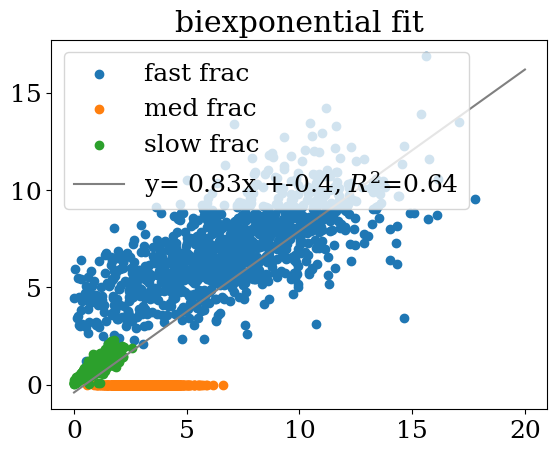

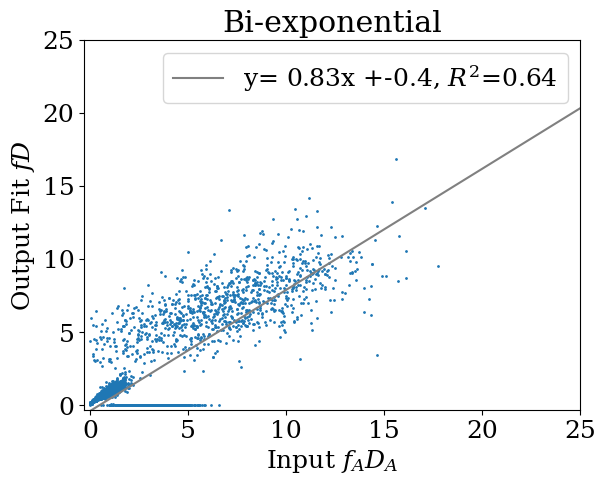

relative percent difference
fast fD  1.25705%
med fD -200.00000%
slow fD 1.65990%

 relative abs percent difference
fast fD  24.46742%
med fD 200.00000%
slow fD 17.25505%

percent bland altman
fast fD BA, 0.018, [-4.778-4.814]
fast fD %BA, 0.264%, [-69.246%-69.775%]

med fD BA, -3.031, [-4.706--1.355]
med fD %BA, -200.000%, [-310.551%--89.449%]

slow fD BA, -0.023, [-0.466-0.420]
slow fD %BA, -2.551%, [-52.563%-47.461%]

all fD BA, -1.012, [-5.073-3.050]
all fD %BA, -32.630%, [-163.646%-98.385%]

individual f and D


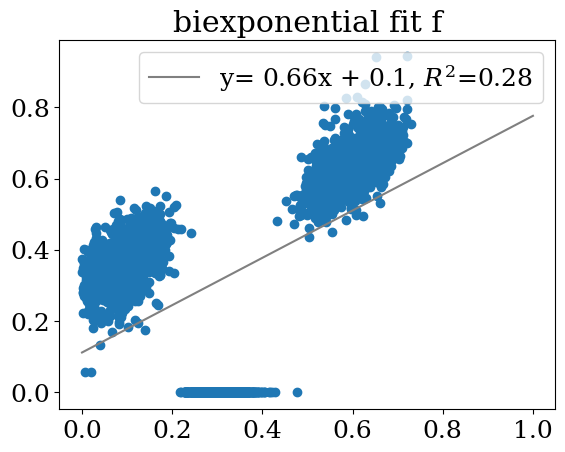

relative percent difference
fast fD  113.28184%
med fD -200.00000%
slow fD 5.49646%

relative abs percent difference
fast fD  113.28184%
med fD -200.00000%
slow fD 5.49646%

percent bland altman
fast f BA, 0.264, [0.144-0.385]
fast f %BA, 114.880%, [62.593%-167.166%]

med f BA, -0.301, [-0.371--0.231]
med f %BA, -200.000%, [-246.453%--153.547%]

slow f BA, 0.037, [-0.075-0.149]
slow f %BA, 5.996%, [-12.084%-24.076%]



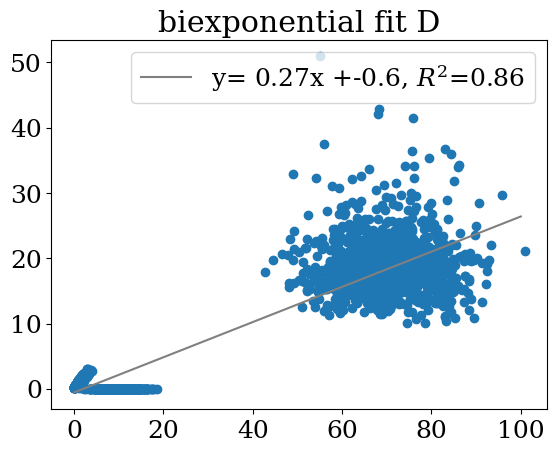

relative percent difference
fast fD  -116.32425%
med fD -200.00000%
slow fD -5.04484%
relative abs percent difference
fast fD  116.32425%
med fD 200.00000%
slow fD 12.90702%

percent bland altman
fast D BA, -51.336, [-71.217--31.455]
fast D %BA, -114.877%, [-159.366%--70.389%]

med D BA, -10.046, [-14.925--5.167]
med D %BA, -200.000%, [-297.140%--102.860%]

slow D BA, -0.123, [-0.652-0.406]
slow D %BA, -8.590%, [-45.584%-28.404%]



In [12]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExpSimulatedCurves_anomalous_12172024_3comp.xlsx'
df_True = pd.read_excel(fileloc,sheet_name = 'TrueData_SNR_50') 

df_TrueParams = pd.read_excel(fileloc,sheet_name = 'Parameters') 
df_TrueParams=df_TrueParams.rename(columns={c: 'true '+c for c in df_TrueParams.columns if c not in ['Run Number', 'Unnamed']})
df_TrueParams=df_TrueParams.rename(columns={c: c+'tion' for c in df_TrueParams.columns if 'frac' in c})

df_AveragedNoise = pd.read_excel(fileloc,sheet_name = 'AN_A_SNR_50') 
#Truth=Truth.rename(columns={c: 'True '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})

# trying tri-exp fit to the df_True
b_values11 = np.array([0,10,30,50,80,120,200,400,800])#, 1100, 1380]) # medium range 11 b values 0 - 1380

# trying bi-exp fit to the df_True
TrueFracs = []
TrueDiffs = []
TrueGammas = []
FitFracs = []
FitDiffs = []
r2_fit = []
compartment_number=[]
for j in range(1000):
    #popt, pcov = curve_fit(biexp_func, b_values11,df_AveragedNoise.iloc[j,2:-2],p0=[.1,.7, 0.1, 0.001],bounds=(0, [1,1,.1,.1]),maxfev=10000)
    
    ## order popt from fast to slow diffusion
    #norm_popt = popt[0]+popt[1]
    #idx_sort = popt[2:4].argsort()
    #fracs = popt[0:2]/norm_popt
    #diffusions = popt[2:4]
    #fracs=fracs[idx_sort[::-1]]
    #diffusions=diffusions[idx_sort[::-1]]
    #print(*[df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j],df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    
    
    ## two step fit
    
    # fit slow
    popt1, pcov = curve_fit(monoexp_func, b_values11[6:],df_AveragedNoise.iloc[j,8:],p0=[.7, 0.001],bounds=(0, [1,.1]),maxfev=10000)

    #pl.plot(b_values11, monoexp_func(b_values11, popt1[0], popt1[1]))
    #pl.scatter(b_values11,df_True.iloc[j,2:-2])
    
    # subtract slow fit
    popt2, pcov = curve_fit(monoexp_func, b_values11,df_AveragedNoise.iloc[j,2:]-monoexp_func(b_values11,popt1[0], popt1[1]),p0=[.1, 0.01],bounds=(0, [1,.2]),maxfev=10000)

    
    ## order popt from fast to slow diffusion
    norm_popt = popt1[0]+popt2[0]
    diffusions = [popt2[1], popt1[1]]
    fracs=[popt2[0], popt1[0]]/norm_popt
    #print(*[df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j],df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    #pl.plot(b_values11, biexp_func(b_values11, fracs[0], fracs[1], diffusions[0], diffusions[1]))
    #pl.scatter(b_values11,df_True.iloc[j,2:-2])
    
    
    ## order given true values from fast to slow just in case
    givengammas = np.array([df_TrueParams['true fast gamma'].iloc[j],df_TrueParams['true med gamma'].iloc[j],df_TrueParams['true slow gamma'].iloc[j]])
    givenfracs = np.array([df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j]])
    givendiffusions = np.array([df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    idx_sort = givendiffusions.argsort()
    givenfracs = givenfracs[idx_sort[::-1]]
    givendiffusions = givendiffusions[idx_sort[::-1]]

    TrueFracs.append(list(givenfracs))
    TrueDiffs.append(list(givendiffusions))
    FitFracs.append(list(fracs))
    FitDiffs.append(list(diffusions))
    TrueGammas.append(list(givengammas))
  
    
    y_pred = biexp_func(b_values11, fracs[0], fracs[1], diffusions[0], diffusions[1])
    r2_goodness = r2_score(df_AveragedNoise.iloc[j,2:], y_pred)
    if r2_goodness>0:
        r2_fit.append(r2_goodness)
    else:
        r2_fit.append(0)
    
print(f'goodness of fit: r2={np.mean(r2_fit):.5f}±{np.std(r2_fit):.5f}') 
TruefastfDs= 1000*np.array(TrueFracs)[:,0]*((np.array(TrueDiffs)[:,0]))#**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = 1000*np.array(FitFracs)[:,0]*np.array(FitDiffs)[:,0]

TruemedfDs= 1000*np.array(TrueFracs)[:,1]*(np.array(TrueDiffs)[:,1])#**(1/np.array(TrueGammas)[:,1]))
FitmedfDs = 0*np.array(FitFracs)[:,1]*np.array(FitDiffs)[:,1]

TrueslowfDs= 1000*np.array(TrueFracs)[:,2]*(np.array(TrueDiffs)[:,2])#**(1/np.array(TrueGammas)[:,2])) #setting it to zero
FitslowfDs = 1000*np.array(FitFracs)[:,1]*np.array(FitDiffs)[:,1]



AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))


pl.scatter(TruefastfDs, FitfastfDs,label= 'fast frac')
pl.scatter(TruemedfDs,FitmedfDs,label= 'med frac')
pl.scatter(TrueslowfDs, FitslowfDs,label= 'slow frac')

x = np.linspace(0,20,100)
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)

r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('biexponential fit')
pl.show()

pl.scatter(AllTruefD, allFitfD, s=1)
x = np.linspace(0,25,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('Bi-exponential')
pl.xlabel('Input $f_AD_A$')
pl.ylabel('Output Fit $fD$')
pl.xlim(-0.3,25)
pl.ylim(-0.3,25)
pl.show()



print('relative percent difference')
print(f'fast fD  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median((0-TruemedfDs)/(TruemedfDs + 0)):.5f}%')
print(f'slow fD {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\n relative abs percent difference')
print(f'fast fD  {200*np.median(abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median(abs(0-TruemedfDs)/(TruemedfDs + 0)):.5f}%')
print(f'slow fD {200*np.median(abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')



print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast fD')
blandalt_calc(FitmedfDs,TruemedfDs,'med fD')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow fD')
blandalt_calc(allFitfD,AllTruefD,'all fD')







print('individual f and D')


TruefastfDs= np.array(TrueFracs)[:,0]#*((np.array(TrueDiffs)[:,0]**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = np.array(FitFracs)[:,0]#*np.array(FitDiffs)[:,0]

TruemedfDs= 1*np.array(TrueFracs)[:,1]#*(np.array(TrueDiffs)[:,1]**(1/np.array(TrueGammas)[:,1]))
FitmedfDs = 0*np.array(FitFracs)[:,1]#*np.array(FitDiffs)[:,1]

TrueslowfDs= 1*np.array(TrueFracs)[:,2]#*(np.array(TrueDiffs)[:,2]**(1/np.array(TrueGammas)[:,2])) #setting it to zero
FitslowfDs = 1*np.array(FitFracs)[:,1]#*np.array(FitDiffs)[:,1]



AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))



x = np.linspace(0,1,100)
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)

pl.scatter(AllTruefD,allFitfD)

r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('biexponential fit f')
pl.show()
print('relative percent difference')
print(f'fast fD  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\nrelative abs percent difference')
print(f'fast fD  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')




print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast f')
blandalt_calc(FitmedfDs,TruemedfDs,'med f')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow f')



TruefastfDs= 1000*((np.array(TrueDiffs)[:,0]))#**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = 1000*np.array(FitDiffs)[:,0]

TruemedfDs= 1000*(np.array(TrueDiffs)[:,1])#**(1/np.array(TrueGammas)[:,1]))
FitmedfDs = 0*np.array(FitDiffs)[:,1]

TrueslowfDs= 1000*(np.array(TrueDiffs)[:,2])#**(1/np.array(TrueGammas)[:,2])) #setting it to zero
FitslowfDs = 1000*np.array(FitDiffs)[:,1]



AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))



x = np.linspace(0,100,100)
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)

pl.scatter(AllTruefD,allFitfD)

r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('biexponential fit D')
pl.show()
print('relative percent difference')
print(f'fast fD  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')

print('relative abs percent difference')
print(f'fast fD  {200*np.median(np.abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median(np.abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median(np.abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')




print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast D')
blandalt_calc(FitmedfDs,TruemedfDs,'med D')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow D')




# now two compartment 


# spectral

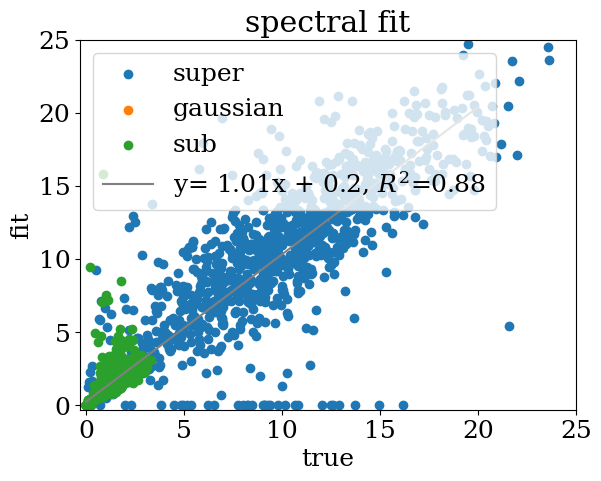

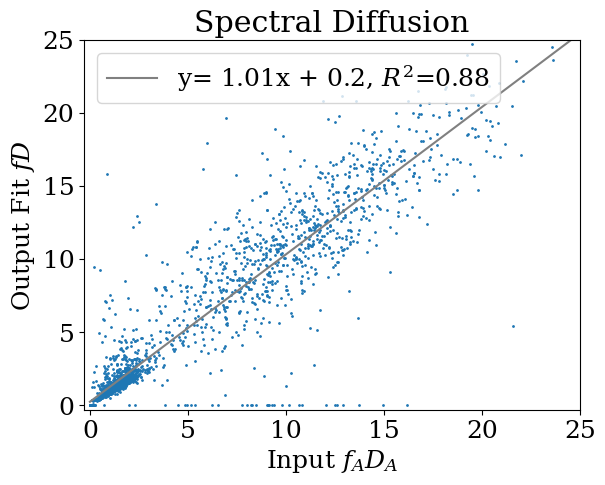

SignificanceResult(statistic=0.9542793607516075, pvalue=0.0)
All fD difference = 0.27807 ± 1.92816, nan%
fast fD difference = 0.63531 ± 3.18927, 7.36494%
med fD difference = 0.00000 ± 0.00000, nan%
slow fD difference = 0.19890 ± 0.87792, 2.19350%
relative percent difference
fast fD  7.10336%
med fD nan%
slow fD 2.16970%

relative abs percent difference
fast fD  16.81295%
med fD nan%
slow fD 14.89763%

percent bland altman
fast fD BA, 0.635, [-5.616-6.886]
fast fD %BA, 6.090%, [-53.827%-66.006%]

med fD BA, 0.000, [0.000-0.000]
med fD %BA, nan%, [nan%-nan%]

slow fD BA, 0.199, [-1.522-1.920]
slow fD %BA, 14.288%, [-109.318%-137.893%]

all fD BA, 0.278, [-3.501-4.057]
all fD %BA, 7.055%, [-88.825%-102.934%]



now just f and D independently


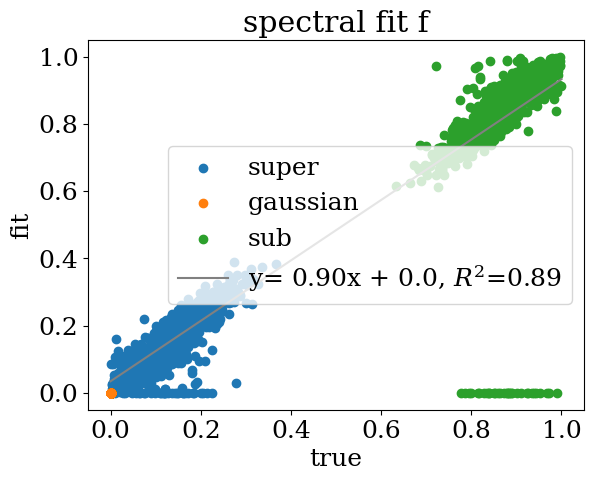

0.9692624813233417 0.14614872302640733
1.936 0.3520000000000026
relative percent difference
fast f  17.28004%
med f nan%
slow f -3.53539%

relative abs percent difference
fast f  21.89149%
med f nan%
slow f 4.01920%

percent bland altman
fast f BA, 0.020, [-0.069-0.110]
fast f %BA, 13.292%, [-44.999%-71.583%]

med f BA, 0.000, [0.000-0.000]
med f %BA, nan%, [nan%-nan%]

slow f BA, -0.052, [-0.356-0.251]
slow f %BA, -6.325%, [-42.883%-30.233%]



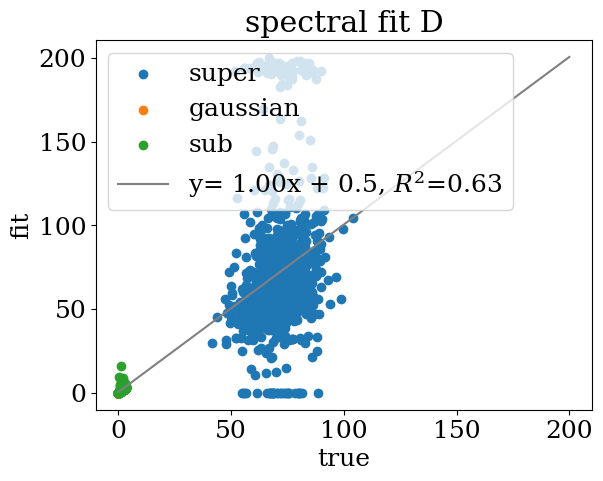

relative percent difference
fast D  -10.12791%
med D nan%
slow D 5.89456%

relative abs percent difference
fast D  21.52928%
med D nan%
slow D 13.30588%

percent bland altman
fast D BA, 0.842, [-74.345-76.028]
fast D %BA, 1.189%, [-105.009%-107.387%]

med D BA, 0.000, [0.000-0.000]
med D %BA, nan%, [nan%-nan%]

slow D BA, 0.265, [-1.492-2.021]
slow D %BA, 16.127%, [-90.938%-123.191%]



In [15]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExpSimulatedCurves_anomalous_12172024_2comp.xlsx'
Truth = pd.read_excel(fileloc,sheet_name = 'Parameters') 
Truth=Truth.rename(columns={c: 'true '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})
Truth=Truth.rename(columns={c: c+'tion' for c in Truth.columns if 'frac' in c})
#Truth=Truth.rename(columns={c: 'diffusion' for c in Truth.columns if ' D' in c})


fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/Simulated_2peak_AnomalousDiffusionSpectra_Fits_rerun.xlsx'
TrueDataFits = pd.read_excel(fileloc,sheet_name = 'lmd_01_AN_A_SNR_50_s') #s means sorted
TrueDataFits=TrueDataFits.rename(columns={c: 'Fit '+c for c in TrueDataFits.columns if c not in ['Run Number', 'Unnamed']})



df_AveragedData = pd.merge(Truth, TrueDataFits, how = 'inner', left_on=["Run Number"], right_on = ['Run Number'])
df_AveragedData['Fit slow diffusion'] = df_AveragedData['Fit slow diffusion'].fillna(0)

df_AveragedData = CalculatePE_fraction(df_AveragedData, 'fast fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'med fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'slow fraction')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'fast diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'med diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'slow diffusion')


TruefastfDs = 1000*df_AveragedData['true fast fraction']*(df_AveragedData['true fast diffusion'])#**(1/df_AveragedData['true fast gamma']))
TruemedfDs = 1000*df_AveragedData['true med fraction']*(df_AveragedData['true med diffusion'])#**(1/df_AveragedData['true med gamma']))
TrueslowfDs = 1000*df_AveragedData['true slow fraction']*(df_AveragedData['true slow diffusion'])#**(1/df_AveragedData['true slow gamma']))

FitfastfDs = df_AveragedData['Fit fast fraction']*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']*df_AveragedData['Fit slow diffusion']



pl.scatter(TruefastfDs,FitfastfDs,label='super')
pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
pl.scatter(TrueslowfDs,FitslowfDs,label='sub')


AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('spectral fit')
pl.xlabel('true')
pl.ylabel('fit')
pl.xlim(-0.3,25)
pl.ylim(-0.3,25)
pl.show()


pl.scatter(AllTruefD, allFitfD, s=1)
x = np.linspace(0,25,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('Spectral Diffusion')
pl.xlabel('Input $f_AD_A$')
pl.ylabel('Output Fit $fD$')
pl.xlim(-0.3,25)
pl.ylim(-0.3,25)
pl.show()


print(scipy.stats.spearmanr(AllTruefD,allFitfD))
print(f'All fD difference = {np.mean(allFitfD - AllTruefD):.5f} ± {np.std(allFitfD - AllTruefD):.5f}, {100*np.median((allFitfD - AllTruefD)/AllTruefD):.5f}%')
print(f'fast fD difference = {np.mean(FitfastfDs - TruefastfDs):.5f} ± {np.std(FitfastfDs - TruefastfDs):.5f}, {100*np.median((FitfastfDs - TruefastfDs)/TruefastfDs):.5f}%')
print(f'med fD difference = {np.mean(FitmedfDs - TruemedfDs):.5f} ± {np.std(FitmedfDs - TruemedfDs):.5f}, {100*np.median((FitmedfDs - TruemedfDs)/TruemedfDs):.5f}%')
print(f'slow fD difference = {np.mean(FitslowfDs - TrueslowfDs):.5f} ± {np.std(FitslowfDs - TrueslowfDs):.5f}, {100*np.median((FitslowfDs - TrueslowfDs)/TrueslowfDs):.5f}%')

print('relative percent difference')
print(f'fast fD  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\nrelative abs percent difference')
print(f'fast fD  {200*np.median(abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median(abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median(abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast fD')
blandalt_calc(FitmedfDs,TruemedfDs,'med fD')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow fD')
blandalt_calc(allFitfD,AllTruefD,'all fD')










print('\n\nnow just f and D independently')


TruefastfDs = df_AveragedData['true fast fraction']#*(df_AveragedData['true fast diffusion']**(1/df_AveragedData['true fast gamma']))
TruemedfDs = df_AveragedData['true med fraction']#*(df_AveragedData['true med diffusion']**(1/df_AveragedData['true med gamma']))
TrueslowfDs = df_AveragedData['true slow fraction']#*(df_AveragedData['true slow diffusion']**(1/df_AveragedData['true slow gamma']))

FitfastfDs = df_AveragedData['Fit fast fraction']#*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']#*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']#*df_AveragedData['Fit slow diffusion']



pl.scatter(TruefastfDs,FitfastfDs,label='super')
pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
pl.scatter(TrueslowfDs,FitslowfDs,label='sub')


AllTruefD = np.array(list(TruefastfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitslowfDs))

x = np.linspace(0,1,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('spectral fit f')
pl.xlabel('true')
pl.ylabel('fit')
pl.show()


TrueDataFits.loc[TrueDataFits['Fit rsq'] < 0, 'Fit rsq'] = 0
print(np.mean(TrueDataFits['Fit rsq']), np.std(TrueDataFits['Fit rsq']))
print(np.mean(TrueDataFits['Fit number of peaks']), np.std(TrueDataFits['Fit number of peaks']))




print('relative percent difference')
print(f'fast f  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med f {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow f {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')

print('\nrelative abs percent difference')
print(f'fast f  {200*np.median(abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med f {200*np.median(abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow f {200*np.median(abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast f')
blandalt_calc(FitmedfDs,TruemedfDs,'med f')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow f')






TruefastfDs = 1000*(df_AveragedData['true fast diffusion'])#**(1/df_AveragedData['true fast gamma']))
TruemedfDs = 1000*(df_AveragedData['true med diffusion'])#**(1/df_AveragedData['true med gamma']))
TrueslowfDs = 1000*(df_AveragedData['true slow diffusion'])#**(1/df_AveragedData['true slow gamma']))

FitfastfDs = df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow diffusion']



pl.scatter(TruefastfDs,FitfastfDs,label='super')
pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
pl.scatter(TrueslowfDs,FitslowfDs,label='sub')


AllTruefD = np.array(list(TruefastfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitslowfDs))

x = np.linspace(0,200,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('spectral fit D')
pl.xlabel('true')
pl.ylabel('fit')
pl.show()

print('relative percent difference')
print(f'fast D  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med D {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow D {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')




print('\nrelative abs percent difference')
print(f'fast D  {200*np.median(abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med D {200*np.median(abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow D {200*np.median(abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast D')
blandalt_calc(FitmedfDs,TruemedfDs,'med D')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow D')



# tri-exp 2 comp anomalous noise

goodness of fit: r2=0.98606±0.07598


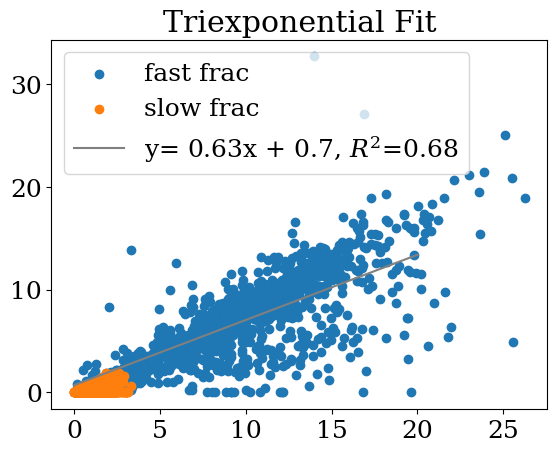

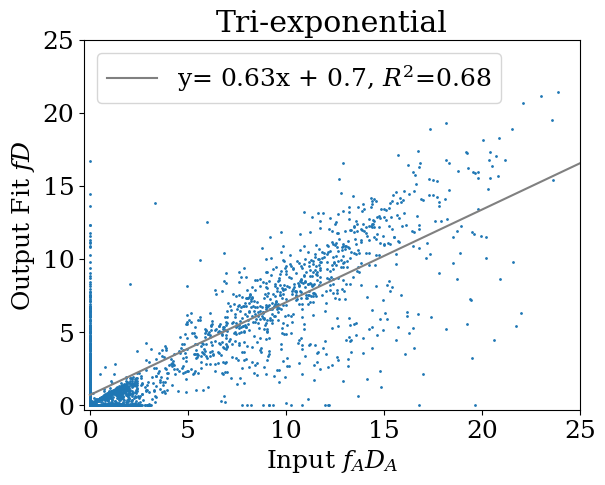

SignificanceResult(statistic=0.8324151899123944, pvalue=0.0)
All fD difference = -0.00068 ± 0.00276, nan%
fast fD mean difference = -2.96140± 3.23918, 27.32391%
med fD mean difference = 1.81573± 1.98506, nan%
slow fD mean difference = -0.90030± 0.69118, 91.25698%
relative percent difference
fast fD  -29.62072%
med fD nan%
slow fD -167.67115%

relative abs percent difference
fast fD  31.32352%
med fD nan%
slow fD 167.67115%

percent bland altman
fast fD BA, -2.961, [-9.310-3.387]
fast fD %BA, -34.298%, [-107.827%-39.231%]

med fD BA, 1.816, [-2.075-5.706]
med fD %BA, 200.000%, [-228.555%-628.555%]

slow fD BA, -0.900, [-2.255-0.454]
slow fD %BA, -106.859%, [-267.654%-53.936%]

all fD BA, -0.682, [-6.495-5.131]
all fD %BA, -19.702%, [-187.644%-148.241%]

now just f and D independently


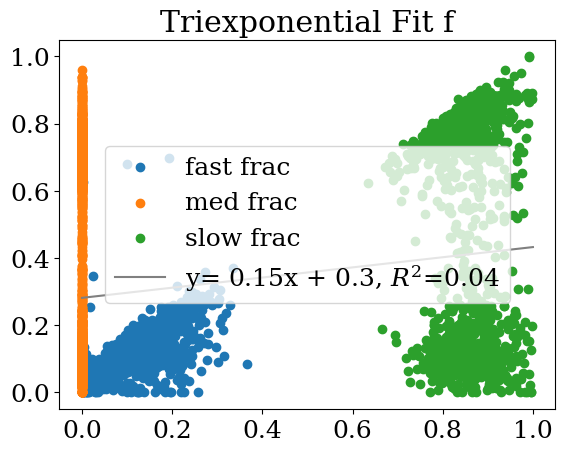

relative percent difference
fast D  1.00458%
med D nan%
slow D -75.25143%

relative abs percent difference
fast f  18.54280%
med f nan%
slow f 75.25143%

percent bland altman
fast f BA, -0.006, [-0.128-0.117]
fast f %BA, -4.047%, [-90.999%-82.904%]

med f BA, 0.419, [-0.172-1.011]
med f %BA, 200.000%, [-82.194%-482.194%]

slow f BA, -0.418, [-1.063-0.227]
slow f %BA, -64.551%, [-164.234%-35.131%]



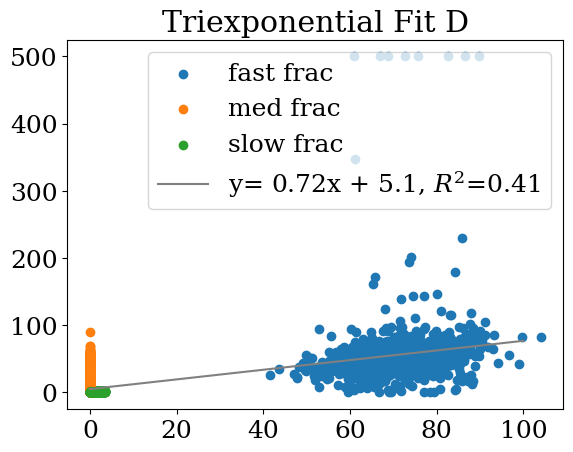

relative percent difference
fast D  -32.60753%
med D nan%
slow D -63.37095%

relative abs percent difference
fast D  34.15814%
med D nan%
slow D 66.10225%

percent bland altman
fast D BA, -14.876, [-104.419-74.668]
fast D %BA, -23.635%, [-165.902%-118.633%]

med D BA, 10.837, [-20.642-42.316]
med D %BA, 200.000%, [-380.942%-780.942%]

slow D BA, -0.923, [-2.509-0.663]
slow D %BA, -88.161%, [-239.677%-63.355%]



In [36]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExpSimulatedCurves_anomalous_12172024_2comp.xlsx'
df_True = pd.read_excel(fileloc,sheet_name = 'TrueData_SNR_50') 

df_TrueParams = pd.read_excel(fileloc,sheet_name = 'Parameters') 
df_TrueParams=df_TrueParams.rename(columns={c: 'true '+c for c in df_TrueParams.columns if c not in ['Run Number', 'Unnamed']})
df_TrueParams=df_TrueParams.rename(columns={c: c+'tion' for c in df_TrueParams.columns if 'frac' in c})

#df_AveragedData = pd.read_excel(fileloc,sheet_name = 'AN_A_SNR_50') 
#df_AveragedData = df_AveragedData.fillna(0)
df_AveragedNoise = pd.read_excel(fileloc,sheet_name = 'AN_A_SNR_50') 
df_AveragedNoise = df_AveragedNoise.fillna(0)

# trying tri-exp fit to the df_True
b_values11 = np.array([0,10,30,50,80,120,200,400,800])#, 1100, 1380]) # medium range 11 b values 0 - 1380

TrueFracs = []
TrueDiffs = []
TrueGammas = []
FitFracs = []
FitDiffs = []
r2_fit=[]
compartment_number=[]
for j in range(1000):
    #norm = df_TrueParams['true fast fraction'].iloc[j]+df_TrueParams['true med fraction'].iloc[j]+df_TrueParams['true slow fraction'].iloc[j]
    #pl.plot(b_values11,df_True.iloc[j,1:]/norm)
    #pl.scatter(b_values11,triexp_func(b_values11, df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j],df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]))
    try:
        popt, pcov = curve_fit(triexp_func, b_values11,df_AveragedNoise.iloc[j,2:],p0=[.1,.2,.7, 0.1, 0.01, 0.001],bounds=(0, [1,1,1,.5,.1,.1]),maxfev=1000)
        norm_popt = popt[0]+popt[1]+popt[2]
        idx_sort = popt[3:6].argsort()
        fracs = popt[0:3]/norm_popt
        diffusions = popt[3:6]
        fracs=fracs[idx_sort[::-1]]
        diffusions=diffusions[idx_sort[::-1]]
    except RuntimeError:
        popt=np.array([0,0,0,0,0,0])
        ## order popt from fast to slow diffusion
        norm_popt = popt[0]+popt[1]+popt[2]
        idx_sort = popt[3:6].argsort()
        fracs = popt[0:3] #nor normalized, because entire fraction is zero
        diffusions = popt[3:6]
        fracs=fracs[idx_sort[::-1]]
        diffusions=diffusions[idx_sort[::-1]]
        
        
    
    ## order given true values from fast to slow just in case
    givengammas = np.array([df_TrueParams['true fast gamma'].iloc[j],df_TrueParams['true med gamma'].iloc[j],df_TrueParams['true slow gamma'].iloc[j]])
    givenfracs = np.array([df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j]])
    givendiffusions = np.array([df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    idx_sort = givendiffusions.argsort()
    givenfracs = givenfracs[idx_sort[::-1]]
    givendiffusions = givendiffusions[idx_sort[::-1]]

    TrueFracs.append(list(givenfracs))
    TrueDiffs.append(list(givendiffusions))
    TrueGammas.append(list(givengammas))
    FitFracs.append(list(fracs))
    FitDiffs.append(list(diffusions))
    
    comp_num = 3-np.count_nonzero(FitFracs==0) #how many compartments with fraction=0
    compartment_number.append(comp_num)
    
    
    try:
        y_pred = triexp_func(b_values11, *popt)
        r2_goodness = r2_score(df_AveragedNoise.iloc[j,2:], y_pred)
    except:
        r2_goodness=0
    r2_fit.append(r2_goodness)
    
print(f'goodness of fit: r2={np.mean(r2_fit):.5f}±{np.std(r2_fit):.5f}') 

TruefastfDs= 1000*np.array(TrueFracs)[:,0]*((np.array(TrueDiffs)[:,0]))#**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = 1000*np.array(FitFracs)[:,0]*np.array(FitDiffs)[:,0]

TruemedfDs= 0*np.array(TrueFracs)[:,2]*(np.array(TrueDiffs)[:,2])#**(1/np.array(TrueGammas)[:,1]))
FitmedfDs = 1000*np.array(FitFracs)[:,1]*np.array(FitDiffs)[:,1]

TrueslowfDs= 1000*np.array(TrueFracs)[:,1]*(np.array(TrueDiffs)[:,1])#**(1/np.array(TrueGammas)[:,0])) #setting it to zero
FitslowfDs = 1000*np.array(FitFracs)[:,2]*np.array(FitDiffs)[:,2]



AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))


pl.scatter(TruefastfDs, FitfastfDs,label= 'fast frac')
#pl.scatter(TruemedfDs,FitmedfDs,label= 'med frac')
pl.scatter(TrueslowfDs, FitslowfDs,label= 'slow frac')

x = np.linspace(0,20,100)
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('Triexponential Fit')
pl.show()





pl.scatter(AllTruefD, allFitfD, s=1)
x = np.linspace(0,25,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('Tri-exponential')
pl.xlabel('Input $f_AD_A$')
pl.ylabel('Output Fit $fD$')
pl.xlim(-0.3,25)
pl.ylim(-0.3,25)
pl.show()


print(scipy.stats.spearmanr((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)))
print(f'All fD difference = {np.mean((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)):.5f} ± {np.std((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)):.5f}, {100*np.median(np.abs(((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)))/(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)):.5f}%')
print(f'fast fD mean difference = {np.mean(FitfastfDs-TruefastfDs):.5f}± {np.std(FitfastfDs-TruefastfDs):.5f}, {100*np.median(np.abs((FitfastfDs-TruefastfDs))/TruefastfDs):.5f}%')
print(f'med fD mean difference = {np.mean(FitmedfDs-TruemedfDs):.5f}± {np.std(FitmedfDs-TruemedfDs):.5f}, {100*np.median(np.abs((FitmedfDs-TruemedfDs))/TruemedfDs):.5f}%')
print(f'slow fD mean difference = {np.mean(FitslowfDs-TrueslowfDs):.5f}± {np.std(FitslowfDs-TrueslowfDs):.5f}, {100*np.median(np.abs((FitslowfDs-TrueslowfDs))/TrueslowfDs):.5f}%')


print('relative percent difference')
print(f'fast fD  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\nrelative abs percent difference')
print(f'fast fD  {200*np.median(abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median(abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median(abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast fD')
blandalt_calc(FitmedfDs,TruemedfDs,'med fD')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow fD')
blandalt_calc(allFitfD,AllTruefD,'all fD')



print('now just f and D independently')


TruefastfDs= np.array(TrueFracs)[:,0]#*((np.array(TrueDiffs)[:,0]**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = np.array(FitFracs)[:,0]#*np.array(FitDiffs)[:,0]

TruemedfDs=0*np.array(TrueFracs)[:,2]#*(np.array(TrueDiffs)[:,1]**(1/np.array(TrueGammas)[:,1]))
FitmedfDs = np.array(FitFracs)[:,1]#*np.array(FitDiffs)[:,1]

TrueslowfDs= np.array(TrueFracs)[:,1]#*(np.array(TrueDiffs)[:,1]**(1/np.array(TrueGammas)[:,0])) #setting it to zero
FitslowfDs = np.array(FitFracs)[:,2]#*np.array(FitDiffs)[:,2]



AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))


pl.scatter(TruefastfDs, FitfastfDs,label= 'fast frac')
pl.scatter(TruemedfDs,FitmedfDs,label= 'med frac')
pl.scatter(TrueslowfDs, FitslowfDs,label= 'slow frac')

x = np.linspace(0,1,100)
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('Triexponential Fit f')
pl.show()


print('relative percent difference')
print(f'fast D  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med D {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow D {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')

print('\nrelative abs percent difference')
print(f'fast f  {200*np.median(abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med f {200*np.median(abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow f {200*np.median(abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast f')
blandalt_calc(FitmedfDs,TruemedfDs,'med f')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow f')





TruefastfDs= 1000*((np.array(TrueDiffs)[:,0]))#**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = 1000*np.array(FitDiffs)[:,0]

TruemedfDs= 0*(np.array(TrueDiffs)[:,2])#**(1/np.array(TrueGammas)[:,1]))
FitmedfDs = 1000*np.array(FitDiffs)[:,1]

TrueslowfDs= 1000*(np.array(TrueDiffs)[:,1])#**(1/np.array(TrueGammas)[:,0])) #setting it to zero
FitslowfDs = 1000*np.array(FitDiffs)[:,2]



AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))


pl.scatter(TruefastfDs, FitfastfDs,label= 'fast frac')
pl.scatter(TruemedfDs,FitmedfDs,label= 'med frac')
pl.scatter(TrueslowfDs, FitslowfDs,label= 'slow frac')

x = np.linspace(0,100,100)
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('Triexponential Fit D')
pl.show()


print('relative percent difference')
print(f'fast D  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med D {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow D {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\nrelative abs percent difference')
print(f'fast D  {200*np.median(abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med D {200*np.median(abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow D {200*np.median(abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast D')
blandalt_calc(FitmedfDs,TruemedfDs,'med D')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow D')




# bi-exp 2 comp anomalous noise

goodness of fit: r2=0.97361±0.06458


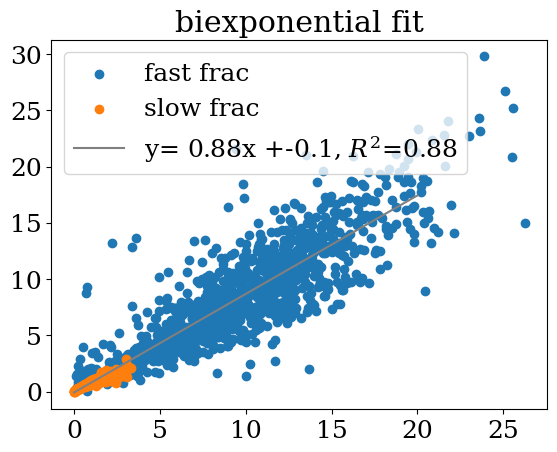

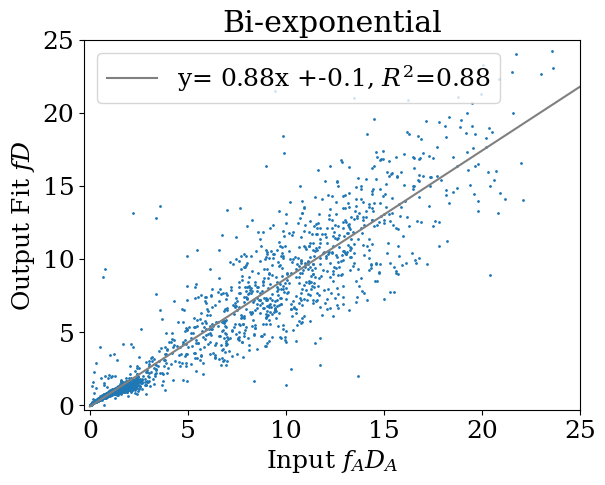

relative percent difference
fast fD  -13.90589%
med fD nan%
slow fD -27.34094%

relative abs percent difference
fast fD  21.36457%
med fD nan%
slow fD 27.72469%

percent bland altman
fast fD BA, -1.220, [-6.454-4.014]
fast fD %BA, -12.838%, [-67.904%-42.229%]

med fD BA, 10.837, [-20.642-42.316]
med fD %BA, 200.000%, [-380.942%-780.942%]

slow fD BA, -0.354, [-0.955-0.246]
slow fD %BA, -31.774%, [-85.630%-22.082%]

all fD BA, -0.787, [-4.608-3.033]
all fD %BA, -14.826%, [-86.778%-57.125%]

individual f and D


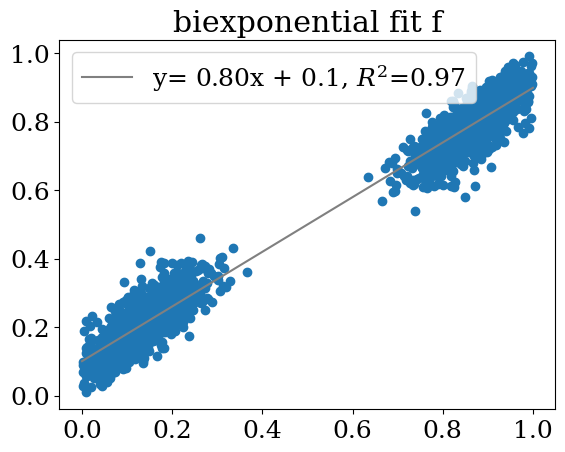

relative percent difference
fast f  39.64807%
med f nan%
slow f -8.48172%

relative abs percent difference
fast f  39.77066%
med f nan%
slow f 8.48172%

percent bland altman
fast f BA, 0.073, [-0.019-0.166]
fast f %BA, 40.553%, [-10.745%-91.852%]

med f BA, 10.837, [-20.642-42.316]
med f %BA, 200.000%, [-380.942%-780.942%]

slow f BA, -0.073, [-0.166-0.019]
slow f %BA, -8.932%, [-20.230%-2.367%]



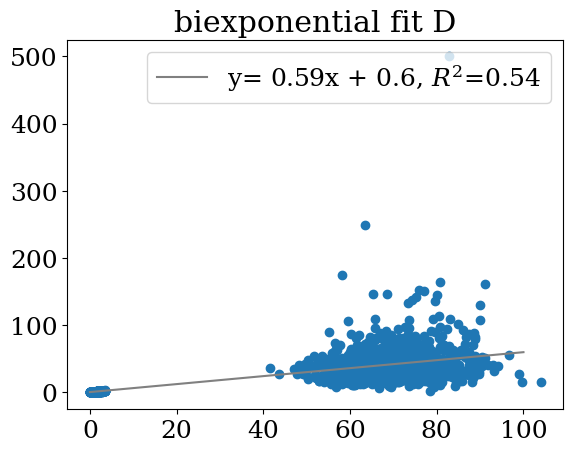

relative percent difference
fast D  -58.69210%
med D nan%
slow D -18.58114%

relative abs percent difference
fast D  60.37766%
med D nan%
slow D 19.15151%

percent bland altman
fast D BA, -27.724, [-82.021-26.574]
fast D %BA, -49.055%, [-145.129%-47.019%]

med D BA, 10.837, [-20.642-42.316]
med D %BA, 200.000%, [-380.942%-780.942%]

slow D BA, -0.296, [-0.814-0.222]
slow D %BA, -21.767%, [-59.885%-16.351%]



In [19]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExpSimulatedCurves_anomalous_12172024_2comp.xlsx'
df_True = pd.read_excel(fileloc,sheet_name = 'TrueData_SNR_50') 

df_TrueParams = pd.read_excel(fileloc,sheet_name = 'Parameters') 
df_TrueParams=df_TrueParams.rename(columns={c: 'true '+c for c in df_TrueParams.columns if c not in ['Run Number', 'Unnamed']})
df_TrueParams=df_TrueParams.rename(columns={c: c+'tion' for c in df_TrueParams.columns if 'frac' in c})

#df_AveragedData = pd.read_excel(fileloc,sheet_name = 'AN_A_SNR_50') 
#df_AveragedData = df_AveragedData.fillna(0)
df_AveragedNoise = pd.read_excel(fileloc,sheet_name = 'AN_A_SNR_50') 
df_AveragedNoise = df_AveragedNoise.fillna(0)


# trying tri-exp fit to the df_True
b_values11 = np.array([0,10,30,50,80,120,200,400,800])#, 1100, 1380]) # medium range 11 b values 0 - 1380


# trying bi-exp fit to the df_True
TrueFracs = []
TrueDiffs = []
TrueGammas = []
FitFracs = []
FitDiffs = []
r2_fit = []
compartment_number=[]
for j in range(1000):
    #popt, pcov = curve_fit(biexp_func, b_values11,df_AveragedNoise.iloc[j,2:-2],p0=[.1,.7, 0.1, 0.001],bounds=(0, [1,1,.1,.1]),maxfev=10000)
    
    ## order popt from fast to slow diffusion
    #norm_popt = popt[0]+popt[1]
    #idx_sort = popt[2:4].argsort()
    #fracs = popt[0:2]/norm_popt
    #diffusions = popt[2:4]
    #fracs=fracs[idx_sort[::-1]]
    #diffusions=diffusions[idx_sort[::-1]]
    #print(*[df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j],df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    
    
    ## two step fit
    
    # fit slow
    popt1, pcov = curve_fit(monoexp_func, b_values11[6:],df_AveragedNoise.iloc[j,8:],p0=[.7, 0.001],bounds=(0, [1,.1]),maxfev=10000)

    #pl.plot(b_values11, monoexp_func(b_values11, popt1[0], popt1[1]))
    #pl.scatter(b_values11,df_True.iloc[j,2:-2])
    
    # subtract slow fit
    popt2, pcov = curve_fit(monoexp_func, b_values11,df_AveragedNoise.iloc[j,2:]-monoexp_func(b_values11,popt1[0], popt1[1]),p0=[.1, 0.01],bounds=(0, [1,.5]),maxfev=10000)

    
    ## order popt from fast to slow diffusion
    norm_popt = popt1[0]+popt2[0]
    diffusions = [popt2[1], popt1[1]]
    fracs=[popt2[0], popt1[0]]/norm_popt
    #print(*[df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j],df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    #pl.plot(b_values11, biexp_func(b_values11, fracs[0], fracs[1], diffusions[0], diffusions[1]))
    #pl.scatter(b_values11,df_True.iloc[j,2:-2])
    
    
    ## order given true values from fast to slow just in case
    givengammas = np.array([df_TrueParams['true fast gamma'].iloc[j],df_TrueParams['true med gamma'].iloc[j],df_TrueParams['true slow gamma'].iloc[j]])
    givenfracs = np.array([df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j]])
    givendiffusions = np.array([df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    idx_sort = givendiffusions.argsort()
    givenfracs = givenfracs[idx_sort[::-1]]
    givendiffusions = givendiffusions[idx_sort[::-1]]

    TrueFracs.append(list(givenfracs))
    TrueDiffs.append(list(givendiffusions))
    FitFracs.append(list(fracs))
    FitDiffs.append(list(diffusions))
    TrueGammas.append(list(givengammas))
  
    
    y_pred = biexp_func(b_values11, fracs[0], fracs[1], diffusions[0], diffusions[1])
    r2_goodness = r2_score(df_AveragedNoise.iloc[j,2:], y_pred)
    if r2_goodness>0:
        r2_fit.append(r2_goodness)
    else:
        r2_fit.append(0)
    
print(f'goodness of fit: r2={np.mean(r2_fit):.5f}±{np.std(r2_fit):.5f}') 
TruefastfDs= 1000*np.array(TrueFracs)[:,0]*((np.array(TrueDiffs)[:,0]))#**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = 1000*np.array(FitFracs)[:,0]*np.array(FitDiffs)[:,0]

TrueslowfDs= 1000*np.array(TrueFracs)[:,1]*(np.array(TrueDiffs)[:,1])#**(1/np.array(TrueGammas)[:,1]))
FitslowfDs = 1000*np.array(FitFracs)[:,1]*np.array(FitDiffs)[:,1]

#TrueslowfDs= 0*np.array(TrueFracs)[:,1]*(np.array(TrueDiffs)[:,1]**(1/np.array(TrueGammas)[:,0])) #setting it to zero
#FitslowfDs = 0*np.array(FitFracs)[:,1]*np.array(FitDiffs)[:,1]



AllTruefD = np.array(list(TruefastfDs)+list(TrueslowfDs))#+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitslowfDs))#+list(FitslowfDs))

pl.scatter(TruefastfDs, FitfastfDs,label= 'fast frac')
#pl.scatter(TruemedfDs,FitmedfDs,label= 'med frac')
pl.scatter(TrueslowfDs, FitslowfDs,label= 'slow frac')

x = np.linspace(0,20,100)
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)

#pl.scatter(AllTruefD,allFitfD)
x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('biexponential fit')
pl.show()


pl.scatter(AllTruefD, allFitfD, s=1)
x = np.linspace(0,25,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('Bi-exponential')
pl.xlabel('Input $f_AD_A$')
pl.ylabel('Output Fit $fD$')
pl.xlim(-0.3,25)
pl.ylim(-0.3,25)
pl.show()




print('relative percent difference')
print(f'fast fD  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')

print('\nrelative abs percent difference')
print(f'fast fD  {200*np.median(abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median(abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median(abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast fD')
blandalt_calc(FitmedfDs,TruemedfDs,'med fD')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow fD')
blandalt_calc(allFitfD,AllTruefD,'all fD')





print('individual f and D')



TruefastfDs= np.array(TrueFracs)[:,0]#*((np.array(TrueDiffs)[:,0]**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = np.array(FitFracs)[:,0]#*np.array(FitDiffs)[:,0]

TrueslowfDs= np.array(TrueFracs)[:,1]#*(np.array(TrueDiffs)[:,1]**(1/np.array(TrueGammas)[:,1]))
FitslowfDs = np.array(FitFracs)[:,1]#*np.array(FitDiffs)[:,1]



AllTruefD = np.array(list(TruefastfDs)+list(TrueslowfDs))#+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitslowfDs))#+list(FitslowfDs))


x = np.linspace(0,1,100)
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)

pl.scatter(AllTruefD,allFitfD)

r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('biexponential fit f')
pl.show()
print('relative percent difference')
print(f'fast f  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med f {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow f {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')



print('\nrelative abs percent difference')
print(f'fast f  {200*np.median(abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med f {200*np.median(abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow f {200*np.median(abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast f')
blandalt_calc(FitmedfDs,TruemedfDs,'med f')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow f')




TruefastfDs= 1000*(np.array(TrueDiffs)[:,0])#**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = 1000*np.array(FitDiffs)[:,0]

TrueslowfDs= 1000*(np.array(TrueDiffs)[:,1])#**(1/np.array(TrueGammas)[:,1]))
FitslowfDs = 1000*np.array(FitDiffs)[:,1]



AllTruefD = np.array(list(TruefastfDs)+list(TrueslowfDs))#+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitslowfDs))#+list(FitslowfDs))



x = np.linspace(0,100,100)
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)

pl.scatter(AllTruefD,allFitfD)

r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('biexponential fit D')
pl.show()
print('relative percent difference')
print(f'fast D  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med D {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow D {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\nrelative abs percent difference')
print(f'fast D  {200*np.median(abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med D {200*np.median(abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow D {200*np.median(abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast D')
blandalt_calc(FitmedfDs,TruemedfDs,'med D')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow D')



